# Juntar datos

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import spacy
from spacy.lang.es.stop_words import STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

nlp = spacy.load('es_core_news_md')
sns.set(style='whitegrid')

### Dataset del bot de Telegram

In [2]:
tgdata = pd.read_csv('tg_bot.csv')
tgdata.rename(columns = {'vote':'sentiment'}, inplace = True)
tgdata.columns
tgdata.head(2)

,sentence,sentiment
0,NECESITAMOS #ACOGIDA RESPONSABLE PARA WOLF. PO...,Neutra
1,Internacional de Porto Alegre habría llegado a...,Neutra


### Dataset aerolineas

In [3]:
airlinesdata = pd.read_csv('tweets_public.csv')
airlinesdata = airlinesdata[['airline_sentiment','text']]
airlinesdata.rename(columns = {'airline_sentiment':'sentiment', 'text':'sentence'}, inplace = True)
airlinesdata.head(2)

,sentiment,sentence
0,neutral,Trabajar en #Ryanair como #TMA: https://t.co/r...
1,neutral,@Iberia @FIONAFERRER Cuando gusten en Cancún s...


In [4]:
translateDict = {
    'positive':'Positiva',
    'neutral':'Neutra',
    'negative':'Negativa'
}

In [5]:
airlinesdata['sentiment'] = airlinesdata['sentiment'].map(translateDict)

### Dataset excel

In [6]:
datasetExcel = pd.read_pickle('datasetExcel.pickle')
datasetExcel

,sentence,sentiment
0,abcdesevilla.es: Recio no tiene «indicios pote...,Negativa
1,abcdesevilla.es: Cuatro altos cargos de Empleo...,Negativa
2,La marcha atrás del PP en posponer devolución ...,Negativa
3,Accidente en BUS-VAO A-6 km. 12. Motorista de ...,Negativa
4,"#FF a ti, que deseas desesperadamente hacerme ...",Negativa
...,...,...
13196,vivificantes,Positiva
13197,voluntariosa,Positiva
13198,voluntariosas,Positiva
13199,voluntarioso,Positiva


### Juntar

In [7]:
frames = [tgdata, airlinesdata, datasetExcel]
data = pd.concat(frames)
data.reset_index(drop=True, inplace=True)
data.head()

,sentence,sentiment
0,NECESITAMOS #ACOGIDA RESPONSABLE PARA WOLF. PO...,Neutra
1,Internacional de Porto Alegre habría llegado a...,Neutra
2,Que alegre está!!💕💕😘😘🦋🦋\n@dmtzdmr https://t.co...,Positiva
3,Estoy triste quiero tatuarme,Negativa
4,ㅤ\n\n Soñé que al fin\n volv...,Negativa


<AxesSubplot:xlabel='sentiment', ylabel='sentence'>

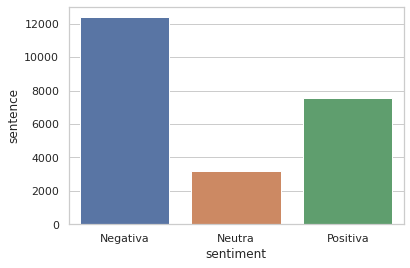

In [8]:
aux = data.groupby('sentiment').count()
sns.barplot(data = aux, x = aux.index, y = 'sentence')

In [9]:
data['sentiment'].value_counts()

Negativa    12383
Positiva     7573
Neutra       3177
Name: sentiment, dtype: int64

In [10]:
data.to_pickle('sentiment_dataset.pkl')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23133 entries, 0 to 23132
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentence   23133 non-null  object
 1   sentiment  23133 non-null  object
dtypes: object(2)
memory usage: 361.6+ KB
None

(23133, 2)


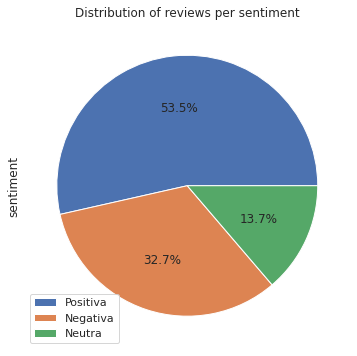

In [11]:
print(data.info())
print("")
print(data.shape)
data['sentiment'].value_counts().plot.pie(figsize=(6,6),title="Distribution of reviews per sentiment",labels=['','',''],autopct='%1.1f%%')
labels=["Positiva","Negativa","Neutra"]
plt.legend(labels,loc=3)
plt.gca().set_aspect('equal')